# TTT4185 Machine learning for Speech technology

## Computer assigment 3a: Classification using Deep Neural Networks

This assignment assumes that the student has reviewed the material on deep neural networks.

In this assignment we will use the high level `Keras` framework together with `Tensorflow` to perform some deep learning experiments.

We will be using a small database of phonemes, where each phoneme is represented by the four first formant positions ("F1"-"F4") and their corresponding bandwidths ("B1"-"B4"). All numbers are in kHz. In addition, the speaker ID and the gender of the speaker are given for each phoneme.

The first few cells of this notebook contain example code to load and extract data, setup a simple network and train a deep neural network for classification. 

Note that we do not have a test dataset, but only training and validation sets. We do some experiments on the training set and observe the effect on the validation set.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [28]:
# Load data from CSV files 
rawtrain = pd.read_csv("task3_files/Train.csv")
rawvalid = pd.read_csv("task3_files/Validation.csv")

# Take a peek at the raw data
rawtrain.head(10)

,SpeakerID,Gender,Phoneme,F1,F2,F3,F4,B1,B2,B3,B4
0,cjf0,F,h#,0.701982,2.125440,2.433528,3.530050,0.264459,0.326273,0.300301,0.410096
1,cjf0,F,q,0.340942,2.594934,2.788244,4.028250,0.282159,0.471724,0.310578,0.505835
2,cjf0,F,iy,0.487078,2.605132,3.093409,4.354061,0.174520,0.340025,0.232818,0.413965
3,cjf0,F,v,0.505536,2.034326,2.804329,4.130655,0.190478,0.307295,0.301741,0.370238
4,cjf0,F,ih,0.524527,2.055382,2.989248,4.480000,0.164466,0.312337,0.301859,0.362134
5,cjf0,F,n,0.601591,2.046562,3.251497,4.561420,0.185757,0.334235,0.316704,0.381524
6,cjf0,F,eh,0.762154,2.127740,3.212496,4.412842,0.207840,0.303633,0.285026,0.384152
7,cjf0,F,n,0.714553,1.837149,3.218620,5.001730,0.252105,0.311876,0.333318,0.432281
8,cjf0,F,q,0.619766,2.276717,3.109751,4.658425,0.231525,0.314789,0.406002,0.417538
9,cjf0,F,ix,0.463761,2.181577,2.859900,4.327639,0.170244,0.319690,0.291556,0.425367


In [31]:
# We will be classifying three different vowels. Extract the training and validation data
phonemes = ["ae", "ey", "ux"]
train = rawtrain[rawtrain["Phoneme"].isin(phonemes)]
valid = rawvalid[rawvalid["Phoneme"].isin(phonemes)]
trainlabels = [phonemes.index(ph) for ph in train["Phoneme"]]
validlabels = [phonemes.index(ph) for ph in valid["Phoneme"]]

In [34]:
# Features to use
features = ["F1","F2"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

In [23]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

/18 [==============================] - 0s 3ms/step - loss: 0.4418 - accuracy: 0.8273 - val_loss: 0.6191 - val_accuracy: 0.7491
Epoch 863/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4408 - accuracy: 0.8219 - val_loss: 0.6197 - val_accuracy: 0.7491
Epoch 864/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4407 - accuracy: 0.8219 - val_loss: 0.6239 - val_accuracy: 0.7491
Epoch 865/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4400 - accuracy: 0.8237 - val_loss: 0.6174 - val_accuracy: 0.7454
Epoch 866/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4403 - accuracy: 0.8255 - val_loss: 0.6183 - val_accuracy: 0.7491
Epoch 867/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4408 - accuracy: 0.8255 - val_loss: 0.6203 - val_accuracy: 0.7491
Epoch 868/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4402 - accuracy: 0.8219 - val_loss: 0.6196 - val_accuracy: 0.7491
Epoch 869

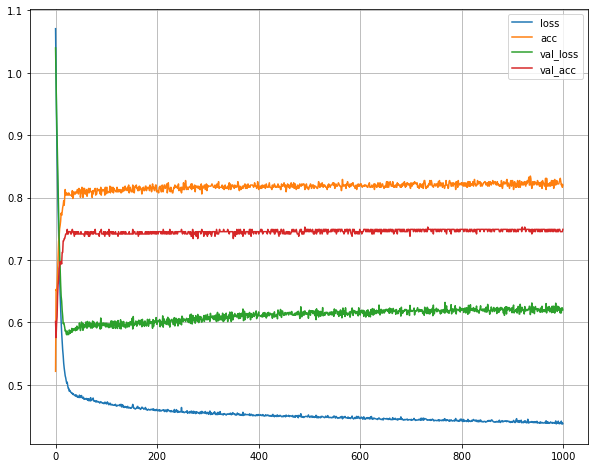

In [26]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [29]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.6200262308120728
Validation accuracy: 0.7490774989128113


## Problem 1
Increase the number of features to include "F3" and "F4" and rerun the experiments. Try also adding the bandwidths ("B1"-"B4").

/18 [==============================] - 0s 3ms/step - loss: 0.1735 - accuracy: 0.9263 - val_loss: 0.9171 - val_accuracy: 0.7159
Epoch 863/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1770 - accuracy: 0.9371 - val_loss: 0.9286 - val_accuracy: 0.7159
Epoch 864/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1746 - accuracy: 0.9353 - val_loss: 0.9233 - val_accuracy: 0.7159
Epoch 865/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1721 - accuracy: 0.9388 - val_loss: 0.9147 - val_accuracy: 0.7159
Epoch 866/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1714 - accuracy: 0.9371 - val_loss: 0.9265 - val_accuracy: 0.7122
Epoch 867/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1730 - accuracy: 0.9371 - val_loss: 0.9272 - val_accuracy: 0.7232
Epoch 868/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1719 - accuracy: 0.9353 - val_loss: 0.9182 - val_accuracy: 0.7159
Epoch 869

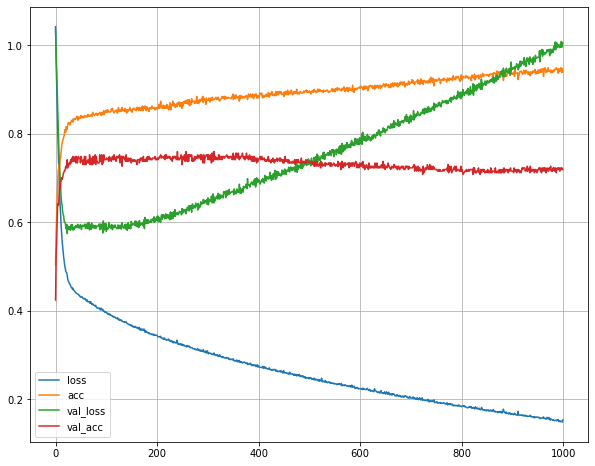

Validation loss: 1.0054399967193604
Validation accuracy: 0.7195571660995483


In [32]:
# Features to use
features = ["F1","F2","F3","F4","B1","B2","B3","B4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

## Problem 2
Change the number of nodes in the hidden layer and see how the results change. Try using dropout, and observe the results.

In [ ]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.11111),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

## Problem 3
Add multiple layers to the network and observe the results.

In [ ]:
# Add more layers
model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=256),
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=128),
    keras.layers.Dense(32, activation=tf.nn.relu, input_dim=64),    
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

## Problem 4
Use the data to predict the gender of the speaker. Try including the format bandwidths as features as well ("B1"-"B4").